In [9]:
import pandas as pd
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from datetime import datetime
import time
import re
import logging
import traceback
import numpy as np
from random import randint
import sys
import itertools
from threading import Thread
from time import sleep

In [82]:
driver = webdriver.Chrome()
wait = WebDriverWait(driver, 8)

In [83]:
x = driver.get("https://www.google.se/maps/place/Kolm%C3%A5rden+Zoo/@58.6622209,16.4592075,15z/data=!4m7!3m6!1s0x0:0x639fdd3925456815!8m2!3d58.6622209!4d16.4592075!9m1!1b1")
time.sleep(4)

In [84]:
def clearwidgets(x):
                menu_bt = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="yDmH0d"]/c-wiz/div/div/div/div[2]/div[1]/div[3]/div[1]/div[1]/form[2]/div/div/button')))  
                menu_bt.click()

                #n_menu_bt = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="yDmH0d"]/c-wiz/div/div/div/div[2]/div[3]/div[2]/div/div[2]/div[1]/div/button')))
                #m_menu_bt = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="yDmH0d"]/c-wiz/div/div/div/div[2]/div[4]/div[2]/div/div[2]/div[1]/div/button')))
                #o_menu_bt = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="yDmH0d"]/c-wiz/div/div/div/div[2]/div[5]/div[2]/div[2]/div/div[2]/div[1]/div/button')))

                #n_menu_bt.click()
                #m_menu_bt.click()
                #o_menu_bt.click()

                #widget = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="yDmH0d"]/c-wiz/div/div/div/div[2]/form/div/button')))  
                #widget.click()

In [85]:
def sorting(x):
            drop_menu = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[9]/button')))
            drop_menu.click()
            time.sleep(2)
            latest = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="action-menu"]/ul/li[2]')))
            latest.click()
            time.sleep(2) 

In [86]:
def scrolling(x):
            #Hitta totala antalet recensioner
            total_number_of_reviews = driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div/div[2]/div[2]').text.split(" ")[0:2]
            total_number_of_reviews = ''.join(total_number_of_reviews)
            total_number_of_reviews = int(total_number_of_reviews)
            #Hitta diven för scrollning
            scrollable_div = driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]') #Kanske om vi går via klassen istället?
            #Skapa en kill-switch/timer
            sixMinutes = Thread(target=lambda:sleep(800)) # 12 min
            sixMinutes.start()
            for i in range(0,(round(total_number_of_reviews/10 - 1))): #Här har vi t.ex. 145 iterationer för Moderna Museet (1303/9)
                    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', scrollable_div)
                    time.sleep(randint(2,7)*0.7)
                    if not sixMinutes.is_alive(): break

In [87]:
def applybs4(x):
            response = BeautifulSoup(driver.page_source, 'html.parser')
            reviews = response.find_all('div', class_="jftiEf fontBodyMedium")
            rev_dict = {'Review Rate': [],
                'Review Time': [],
                'Review Text' : []}
            for review in reviews:
                review_rate = review.find('span', class_='kvMYJc')["aria-label"]
                review_time = review.find('span',class_='rsqaWe').text
                review_text = review.find('span',class_='wiI7pd').text
                rev_dict['Review Rate'].append(review_rate)
                rev_dict['Review Time'].append(review_time)
                rev_dict['Review Text'].append(review_text)  
            return(pd.DataFrame(rev_dict))       

In [88]:
clearwidgets(x)

In [89]:
sorting(x)

In [90]:
scrolling(x)

In [91]:
df = applybs4(x)

In [92]:
df #Kolmården

,Review Rate,Review Time,Review Text
0,4 stjärnor,för 29 minuter sedan,
1,5 stjärnor,för 2 timmar sedan,
2,5 stjärnor,för 12 timmar sedan,
3,5 stjärnor,för 13 timmar sedan,
4,5 stjärnor,för 14 timmar sedan,Härlig djurpark. Kan rekommendera besök på låg...
...,...,...,...
925,5 stjärnor,för 2 månader sedan,
926,5 stjärnor,för 2 månader sedan,
927,4 stjärnor,för 2 månader sedan,"En dyr upplevelse, dock en god sådan. Påkostad..."
928,5 stjärnor,för 2 månader sedan,(Översatt av Google) Vi hade bara en dag till ...


In [81]:
#driver.close()

In [93]:
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

In [94]:
stop_words = stopwords.words('swedish')
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(text)) if word not in stop_words] for text in texts]

In [95]:
df['Review_Text_Clean'] = remove_stopwords(df['Review Text'])

In [99]:
df['Review_Text_CleanJoin'] = df['Review_Text_Clean'].str.join(' ')

In [107]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [102]:
text = " ".join(review for review in df.Review_Text_CleanJoin)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 35308 words in the combination of all review.


In [108]:
stopwords = set(STOPWORDS)
stopwords.update(["översatt", "google"])

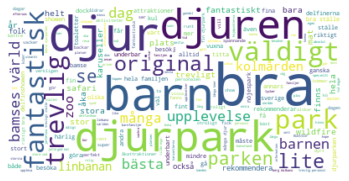

In [109]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()